In [60]:
import numpy as np

from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential, Input, Model, load_model
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [61]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [62]:
tensor_board = TensorBoard(
    log_dir= './logs',
    histogram_freq = 1,
    embeddings_freq = 1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10
)
model_checkpoint = ModelCheckpoint(
    monitor='val_loss',
    filepath='fashion_model.h5',
    save_best_only=True
)

callbacks = [tensor_board, early_stopping, model_checkpoint]

In [63]:
X_train.shape

(60000, 28, 28)

In [64]:
X_test.shape

(10000, 28, 28)

In [65]:
X_train = X_train.reshape(60000,28,28,1)/255
X_test = X_test.reshape(10000,28,28,1)/255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [66]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [67]:
input_ = Input(shape=X_train.shape[1:])
model = Conv2D(32,kernel_size=(3,3), activation='relu')(input_)
model = MaxPooling2D(pool_size=(4,4))(model)
model = Flatten()(model)
model = Dense(64, activation='relu')(model)
output_ = Dense(10, activation='softmax')(model)

model = Model(inputs=[input_],outputs=[output_])

In [68]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [69]:
hist = model.fit(X_train,
                y_train,
                epochs=30,
                batch_size=32,
                validation_split=0.2,
                callbacks=callbacks)

Epoch 1/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.7189 - accuracy: 0.7455 - val_loss: 0.4048 - val_accuracy: 0.8559
Epoch 2/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3605 - accuracy: 0.8752 - val_loss: 0.3577 - val_accuracy: 0.8737
Epoch 3/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3188 - accuracy: 0.8840 - val_loss: 0.3106 - val_accuracy: 0.8904
Epoch 4/30
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2877 - accuracy: 0.8971 - val_loss: 0.3423 - val_accuracy: 0.8822
Epoch 5/30
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2711 - accuracy: 0.9020 - val_loss: 0.3030 - val_accuracy: 0.8957
Epoch 6/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2456 - accuracy: 0.9111 - val_loss: 0.2970 - val_accuracy: 0.8962
Epoch 7/30
1500/1500 [==============================] - 21s 14ms/step - loss: 0.2370 - accuracy: 0.9119 - val_loss: 0.2745 - v

In [70]:
model = load_model('fashion_model.h5')

In [71]:
y_test.shape

(10000, 10)

In [72]:
X_train.shape

(60000, 28, 28, 1)

In [73]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2831 - accuracy: 0.8999


[0.2830834984779358, 0.8999000191688538]

In [74]:
hist.history

{'loss': [0.5231223702430725,
  0.3539617657661438,
  0.3119049072265625,
  0.28448790311813354,
  0.2653076648712158,
  0.2506864070892334,
  0.239274799823761,
  0.2281288057565689,
  0.22113361954689026,
  0.21242201328277588,
  0.20478324592113495,
  0.19970029592514038,
  0.19292977452278137,
  0.18836528062820435,
  0.18350575864315033,
  0.17982648313045502,
  0.1745716780424118,
  0.17218373715877533,
  0.1655554175376892],
 'accuracy': [0.8132291436195374,
  0.8754791617393494,
  0.8870833516120911,
  0.8976874947547913,
  0.9039166569709778,
  0.9089166522026062,
  0.9128958582878113,
  0.9175624847412109,
  0.9193124771118164,
  0.9234791398048401,
  0.9263333082199097,
  0.9281666874885559,
  0.9302499890327454,
  0.9320208430290222,
  0.9334375262260437,
  0.9350625276565552,
  0.9370625019073486,
  0.9384375214576721,
  0.9411666393280029],
 'val_loss': [0.4047820568084717,
  0.3577254116535187,
  0.3105649948120117,
  0.34228572249412537,
  0.3030354976654053,
  0.296973

In [75]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10),hist.history['val_accuracy'])
plt.plot(np.arange(10),hist.history['accuracy'])

ValueError: x and y must have same first dimension, but have shapes (10,) and (19,)

In [76]:
plt.plot(np.arange(10),hist.history['val_accuracy'])
plt.plot(np.arange(10),hist.history['accuracy'],'r')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (19,)

In [77]:
plt.plot(np.arange(10),hist.history['val_loss'])
plt.plot(np.arange(10),hist.history['loss'],'r')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (19,)

In [78]:
X = np.random.normal(size=(100,1))
y = X * 3 + 4

In [79]:
test = [10,11,12,13]

In [80]:
from keras.models import Sequential
from keras.layers import Dense

In [81]:
X.shape

(100, 1)

In [82]:
y.shape

(100, 1)

In [83]:
model = Sequential()
model.add(Dense(1,input_dim= 1))

In [84]:
model.compile(loss='mse',
             optimizer='sgd')

In [85]:
model.fit(X,y,epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 2ms/step - loss: 19.0914
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 17.5729
Epoch 3/10
4/4 [==============================] - 0s 2ms/step - loss: 14.2225
Epoch 4/10
4/4 [==============================] - 0s 2ms/step - loss: 12.6681
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 10.4635
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 8.7181
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 7.1874
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 6.1836
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 5.2968
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 4.6834


In [ ]:
model.fit(X,y)

In [50]:
test = np.array([10,11,12,13])

In [51]:
test*3+4

array([34, 37, 40, 43])

In [52]:
X.shape

(100, 1)

In [53]:
test.shape

(4,)

In [54]:
model.predict(test.reshape(4,1))

array([[33.999996],
       [37.      ],
       [40.      ],
       [43.      ]], dtype=float32)

In [37]:
X

array([[ 1.29728287, -1.1433588 ,  0.82251955,  0.24097486, -0.36999888,
        -0.89933713,  0.23153709,  1.18887715, -0.89010303, -1.17971295,
         0.30611746, -0.33304989, -0.26990129,  0.92898908,  0.26200183,
        -0.26099568, -0.32459623, -0.7071086 , -0.74964438, -0.88716957,
        -1.30970599,  0.31699035, -0.45282788,  0.29999619, -0.92385956,
         0.31042888,  1.26136527,  0.07039437,  0.40577603, -0.94660875,
         0.93028937,  0.84375481,  0.64377959, -0.4977479 ,  1.40975128,
         0.39800677,  1.4360665 , -0.47489547,  0.45268549, -0.07486143,
        -0.16890725,  1.21796076, -0.15521835,  0.38832482,  0.31315764,
         0.76450997,  0.70284956,  2.46514806, -0.40030255, -0.75550836,
         2.29301145,  2.43825694,  0.8137963 ,  0.38191374, -0.1689903 ,
        -0.1071179 ,  0.0803915 , -0.21603878, -0.2363231 ,  1.14447145,
         1.24041192,  0.63701682,  0.05139893, -0.16927987, -0.98278273,
         0.87722199,  0.65710047, -0.86004136, -0.5

In [121]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

In [122]:
X = np.random.normal(size=(100,3))
y = np.random.choice(2,100)

In [123]:
model_checkpoint = ModelCheckpoint(filepath='test_model.h5',
                                monitor='val_loss',
                                save_best_only=True)
tensor_board = TensorBoard(
    log_dir = './test/logs',
    histogram_freq = 1,
    embeddings_freq = 1
)
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience = 10
)

callbacks = [model_checkpoint, tensor_board, early_stopping]

In [133]:
def make_model(x,y,num):
    model = Sequential()
    model.add(Dense(5, input_dim=3,activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])
    model.fit(X,y, epochs=1000, callbacks=callbacks,verbose=0)
    best_model = load_model('test_model.h5')
    result = best_model.evaluate(X,y)
    return result

In [134]:
make_model(X,y,100)

Epoch 1/1000
4/4 [==============================] - 1s 27ms/step - loss: 0.6908 - accuracy: 0.5436
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.5226
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5175
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4802
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.5283
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7071 - accuracy: 0.4620
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4941
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.6835 - accuracy: 0.4890
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5035
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4670
Epoch 11/1000
4/4 

OSError: SavedModel file does not exist at: test_model.h5/{saved_model.pbtxt|saved_model.pb}

In [101]:
model.fit(X,y,epochs=100,
         validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 168ms/step - loss: 0.7709 - accuracy: 0.5172 - val_loss: 0.7974 - val_accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - 0s 56ms/step - loss: 0.7547 - accuracy: 0.5742 - val_loss: 0.7964 - val_accuracy: 0.4500
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.7380 - accuracy: 0.5703 - val_loss: 0.7954 - val_accuracy: 0.4500
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.7085 - accuracy: 0.5898 - val_loss: 0.7943 - val_accuracy: 0.4500
Epoch 5/100
3/3 [==============================] - 0s 41ms/step - loss: 0.7018 - accuracy: 0.6133 - val_loss: 0.7934 - val_accuracy: 0.4500
Epoch 6/100
3/3 [==============================] - 0s 58ms/step - loss: 0.7196 - accuracy: 0.5625 - val_loss: 0.7919 - val_accuracy: 0.4500
Epoch 7/100
3/3 [==============================] - 0s 30ms/step - loss: 0.7711 - accuracy: 0.5195 - val_loss: 0.7914 - val_accuracy: 0.4500
Epoch 8/100
3/3 [==

In [157]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint

In [ ]:
TensorBoard

In [158]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [159]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [160]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [163]:
def mnist_predict(X_train, y_train, X_val, y_val, epochs, batch_size):
    input_dim = X_train.shape[1]
    n_classes = y_train.shape[1]
    init = 'he_normal'
    dropout1 = 0.2
    dropout2 = 0.2

    model = Sequential()
    model.add(Dense(64,input_dim=input_dim,
                activation='relu',
                kernel_initializer=init))
    model.add(Dropout(dropout1))
    model.add(Dense(128, activation='relu',
                kernel_initializer=init))
    model.add(Dropout(dropout2))
    model.add(Dense(n_classes,activation='softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                 optimizer='rmsprop',
                 metrics=['accuracy'])
    model.fit(X_train,
              y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(X_val,y_val),
             callbacks=callbacks)
    model = load_model('softmax_model.h5')
    
    return model.evaluate(X_val,y_val)

In [164]:
mnist_predict(X_train, y_train, X_test, y_test, epochs = 100, batch_size = 64)

Epoch 1/100
938/938 [==============================] - 3s 3ms/step - loss: 9.0184 - accuracy: 0.3921 - val_loss: 1.0404 - val_accuracy: 0.7130
Epoch 2/100
938/938 [==============================] - 3s 3ms/step - loss: 1.2299 - accuracy: 0.6647 - val_loss: 0.9486 - val_accuracy: 0.8347
Epoch 3/100
938/938 [==============================] - 3s 3ms/step - loss: 0.9700 - accuracy: 0.7600 - val_loss: 0.6161 - val_accuracy: 0.8856
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - loss: 0.7891 - accuracy: 0.8054 - val_loss: 0.4973 - val_accuracy: 0.9008
Epoch 5/100
938/938 [==============================] - 2s 3ms/step - loss: 0.6685 - accuracy: 0.8356 - val_loss: 0.4781 - val_accuracy: 0.9202
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.6130 - accuracy: 0.8483 - val_loss: 0.4133 - val_accuracy: 0.9213
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - loss: 0.5578 - accuracy: 0.8634 - val_loss: 0.3825 - val_accuracy: 0.9297

OSError: SavedModel file does not exist at: softmax_model.h5/{saved_model.pbtxt|saved_model.pb}

In [188]:
from keras.datasets import cifar100
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [172]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [173]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

(50000, 100)

In [ ]:
X

In [191]:
model = Sequential()
model.add(Conv2D(32,
                 kernel_size=(4,4),
                 padding='same',
                 input_shape=X_train.shape[1:],
                 kernel_initializer='he_uniform'
                ))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,
                kernel_size=(2,2),
                padding='valid',
                kernel_initializer='he_uniform',
                activation='relu'
                ))

model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(100,activation='softmax'))

In [194]:
def build_model():
    input_ = input(shape=X_train.shape[1:])
    conv_layer = Conv2D(32,
                 kernel_size=(4,4),
                 padding='same',
                 input_shape=X_train.shape[1:],
                 kernel_initializer='he_uniform'
                )
    conv_layer = Dropout(0.2)(conv_layer)
    conv_layer = MaxPooling2D(pool_size=(2,2))(conv_layer)
    conv_layer = Conv2D(64,
                kernel_size=(2,2),
                padding='valid',
                kernel_initializer='he_uniform',
                activation='relu'
                )(conv_layer)
    conv_layer = MaxPooling2D(pool_size=(4,4))(conv_layer)
    conv_layer = Flatten()(conv_layer)

    fc_layer = Dense(32, activation='relu')(conv_layer)

    output_ = Dense(100, activation='softmax')(fc_layer)

    model = Model(inputs=[input_], outputs = [output_])
    model.compile(loss='hinge',
             optimizer='rmsprop',
             metrics = ['accuracy'])
    return model

In [195]:
model = build_model()

TypeError: raw_input() got an unexpected keyword argument 'shape'

In [184]:
model.compile(loss='hinge',
             optimizer='rmsprop',
             metrics = ['accuracy'])

In [196]:
model.fit(X_train,
         y_train,
         epochs=2,
         batch_size=32,
         validation_split=0.2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

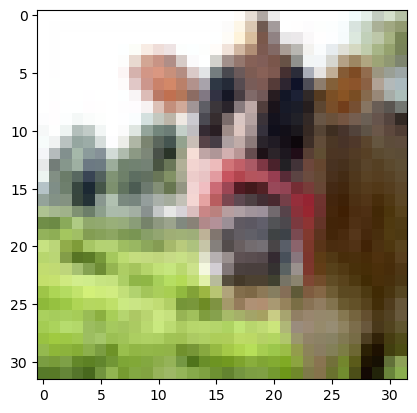

In [187]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [220]:
from keras.models import Model, Sequential, Input
from keras.layers import Dense, LSTM, GRU,Conv1D, MaxPooling1D, GlobalMaxPooling1D
from keras.layers import Embedding
from keras.datasets import imdb
from keras.utils import np_utils
from keras.preprocessing import sequence

In [221]:
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=1000)

In [222]:
print(X_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [223]:
X_train = sequence.pad_sequences(X_train, 1000, padding='post')
X_test = sequence.pad_sequences(X_test, 1000, padding = 'post')
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [225]:
model =Sequential()
model.add(Embedding(1000,64,input_shape=X_train.shape[1:]))
model.add(LSTM(64,recurrent_dropout=0.2, activation='tanh'))
model.add(Dense(1,activation='sigmoid'))

In [226]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train,
         y_train,
         epochs=2,
         batch_size=64,
         validation_split=0.2)

Epoch 1/2


In [208]:
X_train.shape

(25000, 1000)